In [102]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [103]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [104]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [105]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [106]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])


In [107]:
# Create a DataFrame with the scaled data
df_market_transformed = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original DataFrame
df_market_transformed['coin_id'] = df_market_data.index

# Set the coin_id column as index
df_market_transformed.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
df_market_transformed.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [108]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [109]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_transformed)
    inertia.append(kmeans.inertia_)

# Display the inertia values for each k
inertia

c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

[287.0,
 212.1233420748626,
 170.193570879703,
 79.02243535120975,
 71.0979135124442,
 66.10882678044752,
 54.48812315624117,
 43.22469266658042,
 32.86088447122681,
 28.404884636873092,
 24.116198421409198]

In [110]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'inertia': inertia}
# Display the DataFrame
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)


     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


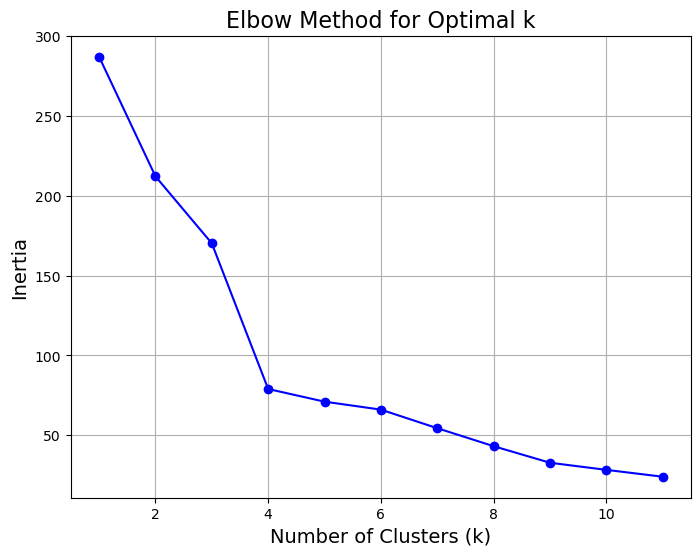

In [111]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='-', markersize=6)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** I believe the best value for k is 4 because the inertia begins to flatten out at that point.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [112]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [113]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(market_data_scaled)

c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [114]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
cluster_predictions = kmeans.predict(market_data_scaled)

# Print the resulting array of cluster values.
print("Predicted Cluster Assignments for Each Cryptocurrency:")
for crypto, cluster in zip(df_market_data.index, cluster_predictions):
    print(f"{crypto}: Cluster {cluster}")

Predicted Cluster Assignments for Each Cryptocurrency:
bitcoin: Cluster 0
ethereum: Cluster 0
tether: Cluster 2
ripple: Cluster 2
bitcoin-cash: Cluster 0
binancecoin: Cluster 0
chainlink: Cluster 0
cardano: Cluster 0
litecoin: Cluster 0
bitcoin-cash-sv: Cluster 2
crypto-com-chain: Cluster 2
usd-coin: Cluster 2
eos: Cluster 2
monero: Cluster 0
tron: Cluster 2
tezos: Cluster 0
okb: Cluster 2
stellar: Cluster 2
cosmos: Cluster 0
cdai: Cluster 2
neo: Cluster 2
wrapped-bitcoin: Cluster 0
leo-token: Cluster 2
huobi-token: Cluster 2
nem: Cluster 2
binance-usd: Cluster 2
iota: Cluster 2
vechain: Cluster 2
zcash: Cluster 0
theta-token: Cluster 2
dash: Cluster 2
ethereum-classic: Cluster 2
ethlend: Cluster 3
maker: Cluster 0
havven: Cluster 2
omisego: Cluster 2
celsius-degree-token: Cluster 1
ontology: Cluster 2
ftx-token: Cluster 2
true-usd: Cluster 2
digibyte: Cluster 2


In [115]:
# Create a copy of the scaled DataFrame
df_market_copy = df_market_transformed.copy()

In [116]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_copy['cluster'] = cluster_predictions

# Display the copy of the scaled DataFrame with the new 'cluster' column
df_market_copy.head(10)


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,2
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,2
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [117]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
scatter_plot = df_market_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="cluster",                  # Color by cluster
    cmap='viridis',               # Color map for clusters
    hover_cols=['coin_id'],       # Show the cryptocurrency name on hover
    size=10,                      # Adjust the size of the points
    title="Scatter Plot of Crypto Price Changes",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=800,                    # Plot width
    height=500                    # Plot height
)

# Show the plot
scatter_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [118]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [119]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_components = pca.fit_transform(df_market_transformed)

# View the scaled PCA data
print(pca_components.shape)

(41, 3)


In [120]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratios for Each Principal Component:")
for i, variance in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {variance:.4f}")

Explained Variance Ratios for Each Principal Component:
Principal Component 1: 0.3720
Principal Component 2: 0.3470
Principal Component 3: 0.1760


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is .8950, or 89.5%, meaning that the first three principal components together explain 89.5% of the total variance of data.

In [121]:
# Create a new DataFrame with the PCA data.
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(3)])

# Copy the crypto names from the original scaled DataFrame
df_pca['coin_id'] = df_market_transformed.index

# Set the coin_id column as index
df_pca.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
df_pca.head(10)

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [122]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [123]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

# Display the inertia values for each k
inertia

c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

[256.87408556789234,
 182.3395300777564,
 140.4318329840836,
 49.665496651797355,
 42.05190109791724,
 31.749005244389014,
 28.031869172552742,
 19.451747206041347,
 13.814081971558092,
 10.630647573870965,
 10.120242629957758]

In [124]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': list(range(1, 12)),
    'inertia': inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


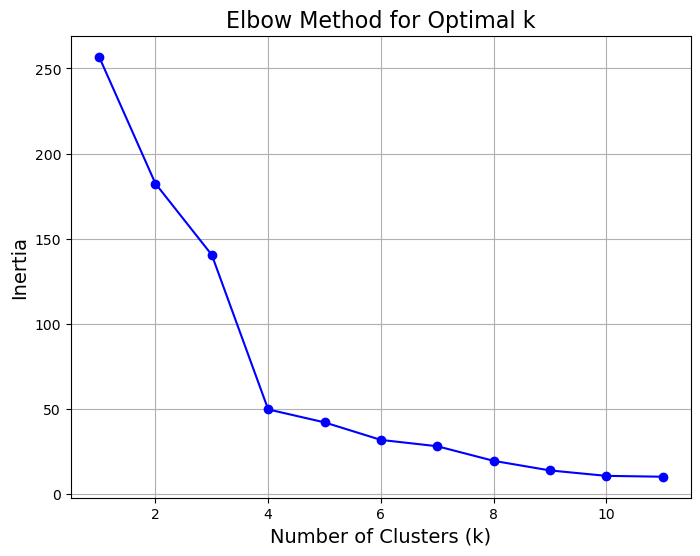

In [125]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', color='b', linestyle='-', markersize=6)
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** I believe 4 is the best again because it flattens out best at the point.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, they both seem to flatten out best at number 4. 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [126]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, random_state=42)

In [127]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_pca)

c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [128]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_predictions = kmeans.predict(df_pca)

# Print the resulting array of cluster values.
print("Predicted Cluster Assignments for Each Cryptocurrency:")
for crypto, cluster in zip(df_pca.index, cluster_predictions):
    print(f"{crypto}: Cluster {cluster}")

Predicted Cluster Assignments for Each Cryptocurrency:
bitcoin: Cluster 0
ethereum: Cluster 0
tether: Cluster 2
ripple: Cluster 2
bitcoin-cash: Cluster 0
binancecoin: Cluster 0
chainlink: Cluster 0
cardano: Cluster 0
litecoin: Cluster 0
bitcoin-cash-sv: Cluster 2
crypto-com-chain: Cluster 2
usd-coin: Cluster 2
eos: Cluster 2
monero: Cluster 0
tron: Cluster 2
tezos: Cluster 0
okb: Cluster 2
stellar: Cluster 2
cosmos: Cluster 0
cdai: Cluster 2
neo: Cluster 2
wrapped-bitcoin: Cluster 0
leo-token: Cluster 2
huobi-token: Cluster 2
nem: Cluster 2
binance-usd: Cluster 2
iota: Cluster 2
vechain: Cluster 2
zcash: Cluster 0
theta-token: Cluster 2
dash: Cluster 2
ethereum-classic: Cluster 2
ethlend: Cluster 3
maker: Cluster 0
havven: Cluster 2
omisego: Cluster 2
celsius-degree-token: Cluster 1
ontology: Cluster 2
ftx-token: Cluster 2
true-usd: Cluster 2
digibyte: Cluster 2


In [129]:
# Create a copy of the scaled PCA DataFrame
df_pca_with_clusters = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_with_clusters['Cluster'] = cluster_predictions

# Display the copy of the scaled PCA DataFrame
print("\nPCA DataFrame with Cluster Assignments:")
print(df_pca_with_clusters.head(10))


PCA DataFrame with Cluster Assignments:
                      PC1       PC2       PC3  Cluster
coin_id                                               
bitcoin         -0.600667  0.842760  0.461595        0
ethereum        -0.458261  0.458466  0.952877        0
tether          -0.433070 -0.168126 -0.641752        2
ripple          -0.471835 -0.222660 -0.479053        2
bitcoin-cash    -1.157800  2.041209  1.859715        0
binancecoin     -0.516534  1.388377  0.804071        0
chainlink       -0.450711  0.517699  2.846143        0
cardano         -0.345600  0.729439  1.478013        0
litecoin        -0.649468  0.432165  0.600303        0
bitcoin-cash-sv -0.759014 -0.201200 -0.217653        2


In [130]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_with_clusters.hvplot.scatter(
    x='PC1', y='PC2',
    by='Cluster',
    hover_cols=['PC1', 'PC2', 'coin_id'],
    width=800, height=600,
    title="Cryptocurrency Clusters (PCA-based)"
)

:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\samke\New folder\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

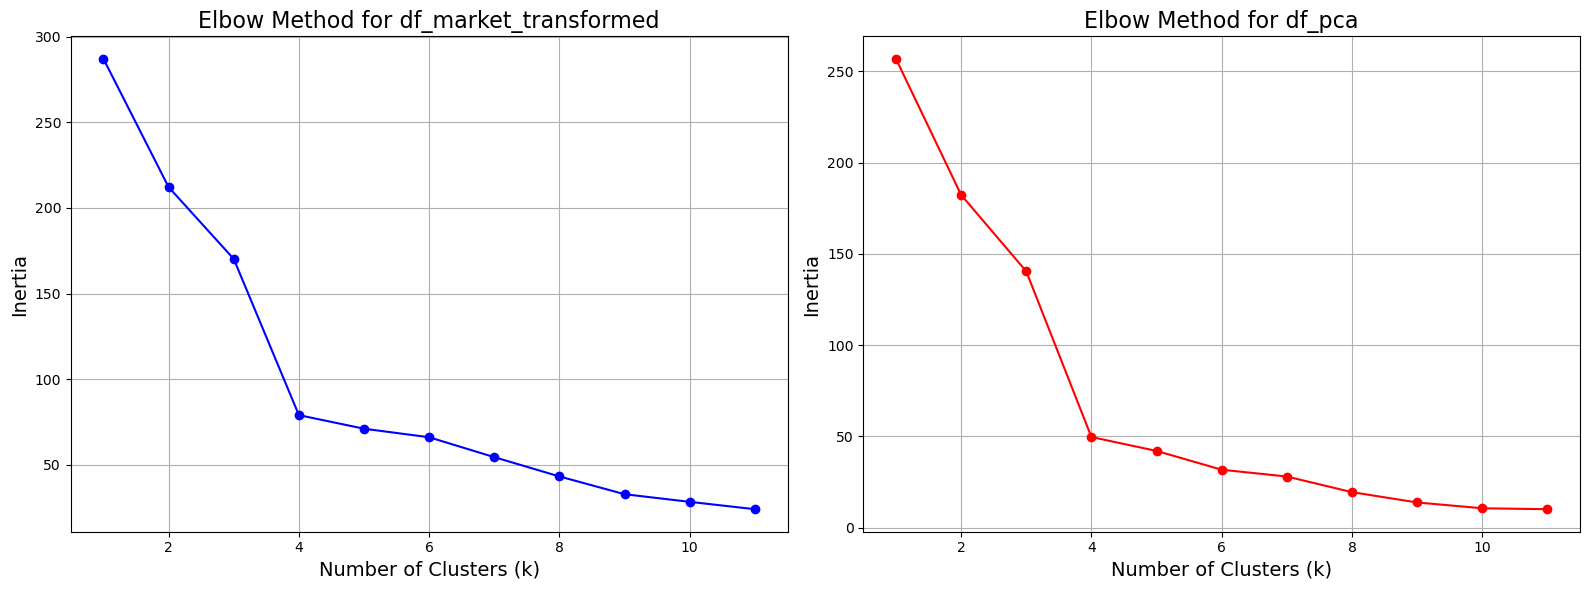

In [132]:
# Composite plot to contrast the Elbow curves
inertia_transformed = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_transformed)
    inertia_transformed.append(kmeans.inertia_)

# Step 2: Compute inertia for df_pca
inertia_pca = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia_pca.append(kmeans.inertia_)

# Step 3: Create DataFrames for both datasets
elbow_data_transformed = {
    'k': list(range(1, 12)),
    'inertia': inertia_transformed
}
elbow_data_pca = {
    'k': list(range(1, 12)),
    'inertia': inertia_pca
}
df_elbow_transformed = pd.DataFrame(elbow_data_transformed)
df_elbow_pca = pd.DataFrame(elbow_data_pca)

# Step 4: Create a composite plot (2 subplots)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Elbow for df_market_transformed
axes[0].plot(df_elbow_transformed['k'], df_elbow_transformed['inertia'], marker='o', color='b', linestyle='-', markersize=6)
axes[0].set_title('Elbow Method for df_market_transformed', fontsize=16)
axes[0].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[0].set_ylabel('Inertia', fontsize=14)
axes[0].grid(True)

# Plot Elbow for df_pca
axes[1].plot(df_elbow_pca['k'], df_elbow_pca['inertia'], marker='o', color='r', linestyle='-', markersize=6)
axes[1].set_title('Elbow Method for df_pca', fontsize=16)
axes[1].set_xlabel('Number of Clusters (k)', fontsize=14)
axes[1].set_ylabel('Inertia', fontsize=14)
axes[1].grid(True)

# Show the composite plot
plt.tight_layout()
plt.show()



In [ ]:
# Composite plot to contrast the clusters
scatter_plot_1 = df_market_copy.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    c="cluster",                  # Color by cluster
    cmap='viridis',               # Color map for clusters
    hover_cols=['coin_id'],       # Show the cryptocurrency name on hover
    size=10,                      # Adjust the size of the points
    title="Scatter Plot of Crypto Price Changes",
    xlabel="24h Price Change (%)",
    ylabel="7d Price Change (%)",
    width=800,                    # Plot width
    height=500                    # Plot height
)

# Scatter plot based on PCA components (transformed data)
scatter_plot_2 = df_pca_with_clusters.hvplot.scatter(
    x='PC1', y='PC2',
    by='Cluster',  # Color points by the cluster label
    hover_cols=['PC1', 'PC2', 'coin_id'],  # Show PCA components and coin name on hover
    width=800, height=600,
    title="Cryptocurrency Clusters (PCA-based)"
)

# Combine the two plots vertically or horizontally
composite_plot = scatter_plot_1 * scatter_plot_2  # This stacks the plots vertically

# Show the composite plot
composite_plot


:Overlay
   .Scatter.I   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster,coin_id)
   .NdOverlay.I :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features can improve clustering performance by enhancing the seperation and cohesion of cluster. However, this comes at the cost of interpretability, as the resulting clusters are based on principal components rather than original features. 
